# Clustering:

### Problem Statement: 

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

**Data Description:**

**Dataset: EastWestAirlines.xlsx**
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. **The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.**

### Importing the required libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Importing the dataset:

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 7 - Clustering/EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Performing EDA:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
#Dropping irrelevant columns:

df1 = df.drop(['ID#','Award?'], axis=1)
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [5]:
# Checking missing values:

df1.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [6]:
df1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


# DBSCAN:

In [7]:
df1.values

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [8]:
array_DBSCAN = df1.values
array_DBSCAN

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

### Normalisation of Data:

In [9]:
stdscaler = StandardScaler()
X = stdscaler.fit_transform(array_DBSCAN)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [10]:
dbscan = DBSCAN(eps=1.5, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=1.5, min_samples=8)

In [11]:
#noisy samples are given label as -1

dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
df1['Cluster']=pd.DataFrame(dbscan.labels_)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
df1['Cluster'].value_counts()

 0    3681
-1     286
 1      22
 2      10
Name: Cluster, dtype: int64

In [14]:
#To find the percentage of the noise points

(len(df1[df1['Cluster']==-1])/len(df1))*100

7.151787946986747

In [15]:
X = metrics.silhouette_score(X,dbscan.labels_)
X

0.5715528877867831

In [16]:
def dbscan(X,eps,min_samples):
    ss=StandardScaler()
    X=ss.fit_transform(X)
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X)
    y_pred=db.fit_predict(X)
    plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='Paired')
    plt.title("DBSCAN")

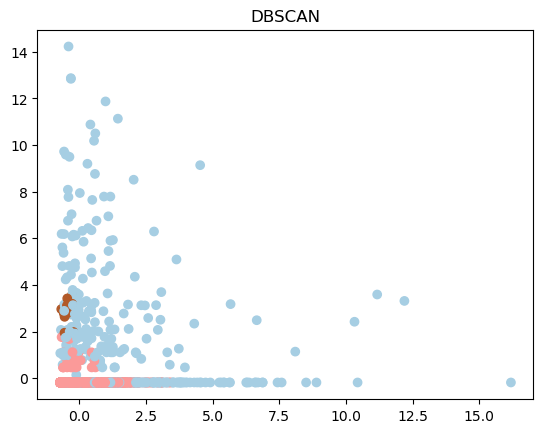

In [17]:
dbscan(array_DBSCAN,1.0,8)

# K-means:

In [18]:
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [19]:
df2 = df1.drop(['Cluster'], axis=1)

In [20]:
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


### Normalisation of Data:

In [21]:
#Similar to the sklearn.preprocessing, StandardScaler function

def norm_func(i):
    x=(i-i.mean())/(i.std())
    return(x)

In [22]:
x=norm_func(df2.iloc[:,0:])
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924


In [23]:
#Normalizaton Function

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_df2 = scaler.fit_transform(df2.iloc[:,0:])

In [24]:
scaled_df2

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

[32088.27969959076, 27558.76517568194, 23807.810658831684, 20348.78522308945, 17724.875828973665, 15871.129769316563, 14359.144831709315, 13228.036693755905]


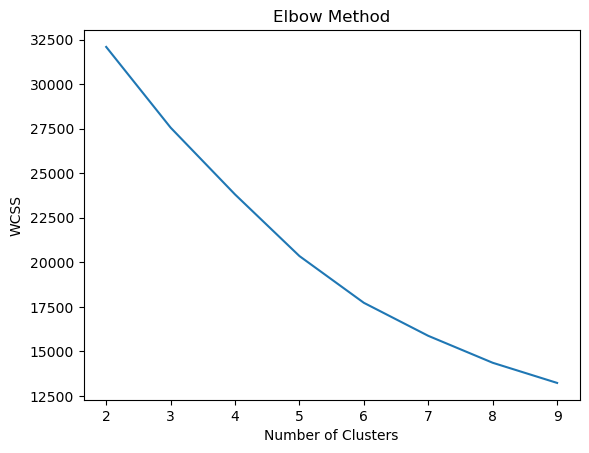

In [25]:
#wcss = Within Clusters Sum of Squares

wcss = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df2)
    wcss.append(kmeans.inertia_)
    
print(wcss)

plt.plot(range(2,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
#Build Cluster Algorithm

from sklearn.cluster import KMeans
clusters_new = KMeans(3,random_state=0)
clusters_new.fit(x)

KMeans(n_clusters=3, random_state=0)

In [27]:
clusters_new.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [28]:
#Assign clusters to new dataset

df2['Clustered_new']=clusters_new.labels_

In [29]:
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clustered_new
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [30]:
#These are the standardised values: 

clusters_new.cluster_centers_

array([[ 1.24892952,  0.82918409,  0.08882387,  0.14805264,  0.09244978,
         0.64835933,  1.63425439,  3.50370508,  3.81124506,  0.30843599],
       [ 0.41554258, -0.00710859,  1.18574734, -0.08815858,  0.10098914,
         0.90202365,  0.74679497, -0.10240531, -0.11299565,  0.34245125],
       [-0.30734357, -0.05112669, -0.64663966,  0.03782427, -0.06070092,
        -0.53041426, -0.51188879, -0.17692897, -0.19159353, -0.20549974]])

In [31]:
df2.groupby('Clustered_new').agg(['mean']).reset_index()

,Clustered_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,199463.030303,785.624242,2.181818,1.036364,1.030303,32803.351515,27.296970,5365.975758,15.830303,4755.521212
1,1,115619.195086,138.821296,3.694713,1.001489,1.032018,38969.262844,18.758004,317.138496,0.946389,4830.054356
2,2,42610.891208,104.475713,1.169811,1.020072,1.000401,4341.215175,6.704135,212.147732,0.646327,3692.771979


In [32]:
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clustered_new
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [33]:
df2['Clustered_new']=df2['Clustered_new'].replace(0,'Cluster1')
df2['Clustered_new']=df2['Clustered_new'].replace(1,'Cluster2')
df2['Clustered_new']=df2['Clustered_new'].replace(2,'Cluster3')
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clustered_new
0,28143,0,1,1,1,174,1,0,0,7000,Cluster3
1,19244,0,1,1,1,215,2,0,0,6968,Cluster3
2,41354,0,1,1,1,4123,4,0,0,7034,Cluster3
3,14776,0,1,1,1,500,1,0,0,6952,Cluster3
4,97752,0,4,1,1,43300,26,2077,4,6935,Cluster2
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,Cluster3
3995,64385,0,1,1,1,981,5,0,0,1395,Cluster3
3996,73597,0,3,1,1,25447,8,0,0,1402,Cluster3
3997,54899,0,1,1,1,500,1,500,1,1401,Cluster3


In [34]:
df2.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Clustered_new'],
      dtype='object')

In [35]:
df2['Clustered_new'].value_counts()

Cluster3    2491
Cluster2    1343
Cluster1     165
Name: Clustered_new, dtype: int64

In [36]:
df2.groupby('Clustered_new').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Clustered_new,,,,,,,,,,
Cluster1,199463.030303,785.624242,2.181818,1.036364,1.030303,32803.351515,27.296970,5365.975758,15.830303,4755.521212
Cluster2,115619.195086,138.821296,3.694713,1.001489,1.032018,38969.262844,18.758004,317.138496,0.946389,4830.054356
Cluster3,42610.891208,104.475713,1.169811,1.020072,1.000401,4341.215175,6.704135,212.147732,0.646327,3692.771979


## Hierarchical Clustering:

In [37]:
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [38]:
df3 = df1.drop(['Cluster'], axis=1)
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


### Normalisation of Data:

In [39]:
#Normalization Function : (MinMax Function)

def minmax_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [40]:
#Normalized data frame (considering the numerical part of data)

df_norm = minmax_func(df3.iloc[:,0:])

In [41]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


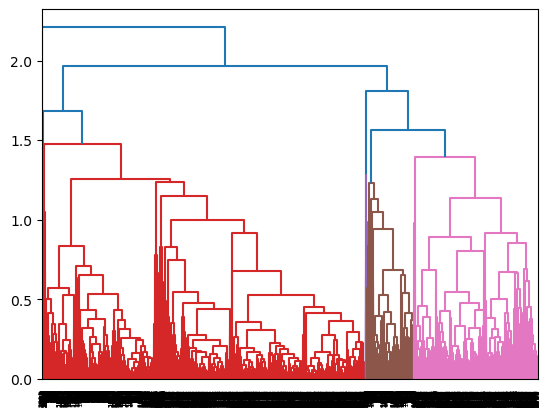

In [42]:
#create dendrogram

dendrogram = sch.dendrogram(sch.linkage(df_norm,method='complete'))

#methods : 'single','complete','centroid','average'

In [43]:
#create clusters

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [44]:
#save clusters for chart

y_hc = hc.fit_predict(df_norm)
y_hc

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [45]:
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [46]:
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,0
...,...
3994,2
3995,2
3996,0
3997,2


In [47]:
Clusters.value_counts()

Clusters
2           2605
0           1390
1              4
dtype: int64

In [48]:
df3['h_clustered']=y_hc
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clustered
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [49]:
df3.groupby('h_clustered').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
h_clustered,,,,,,,,,,
0,107121.805755,148.161151,3.666906,1.001439,1.033094,38980.861151,18.749640,476.129496,1.424460,4185.129496
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000
2,55625.489827,141.643762,1.201152,1.021497,1.001152,5418.927447,7.699424,421.536660,1.272937,4085.983877
